# Timestamp Validation for Exchange Data

This notebook checks the consistency and validity of timestamps in both exchange datasets.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Set style for better visualization


In [9]:
# Load the data
df_a = pd.read_csv('../data/processed/exchange-a_BTC-EUR_2021-2023.csv')
df_b = pd.read_csv('../data/processed/exchange-b_BTC-EUR_2021-2023.csv')

print(f"Exchange A rows: {len(df_a)}")
print(f"Exchange B rows: {len(df_b)}")

Exchange A rows: 1669602
Exchange B rows: 350523


## 1. Check Timestamp Formats

In [11]:
# Display sample timestamps from both exchanges
print("Exchange A timestamp samples:")
print(df_a['timestamp'].head())
print("\nExchange B timestamp samples:")
print(df_b['timestamp'].head())

Exchange A timestamp samples:
0    1.647863e+09
1    1.647863e+09
2    1.647863e+09
3    1.647863e+09
4    1.647863e+09
Name: timestamp, dtype: float64

Exchange B timestamp samples:
0     2022-02-04T16:49:09.15Z
1    2021-01-14T23:07:30.137Z
2    2021-01-14T23:07:30.113Z
3    2021-11-19T15:13:55.607Z
4    2022-04-14T16:20:06.533Z
Name: timestamp, dtype: object


In [12]:
def check_timestamp_format(df, exchange_name):
    """Check various aspects of timestamp format"""
    print(f"\nAnalyzing {exchange_name} timestamps:")
    
    # Check data type
    print(f"Timestamp dtype: {df['timestamp'].dtype}")
    
    # Check for null values
    null_count = df['timestamp'].isnull().sum()
    print(f"Null timestamps: {null_count}")
    
    # Check unique formats (sample of first 1000 rows)
    if isinstance(df['timestamp'].iloc[0], str):
        unique_formats = df['timestamp'].head(1000).apply(len).unique()
        print(f"Unique timestamp lengths: {unique_formats}")

check_timestamp_format(df_a, 'Exchange A')
check_timestamp_format(df_b, 'Exchange B')


Analyzing Exchange A timestamps:
Timestamp dtype: float64
Null timestamps: 0

Analyzing Exchange B timestamps:
Timestamp dtype: object
Null timestamps: 0
Unique timestamp lengths: [23 24 22 20]


## 2. Test Timestamp Conversions

In [13]:
def test_timestamp_conversion(df, exchange_name):
    """Test different timestamp conversion methods"""
    sample = df.head(1000)
    
    print(f"\nTesting {exchange_name} timestamp conversions:")
    
    # Try UNIX timestamp conversion
    try:
        pd.to_datetime(sample['timestamp'], unit='s')
        print("✓ UNIX timestamp conversion successful")
    except:
        print("✗ UNIX timestamp conversion failed")
    
    # Try ISO format conversion
    try:
        pd.to_datetime(sample['timestamp'])
        print("✓ ISO format conversion successful")
    except:
        print("✗ ISO format conversion failed")

test_timestamp_conversion(df_a, 'Exchange A')
test_timestamp_conversion(df_b, 'Exchange B')


Testing Exchange A timestamp conversions:
✓ UNIX timestamp conversion successful
✓ ISO format conversion successful

Testing Exchange B timestamp conversions:
✗ UNIX timestamp conversion failed
✗ ISO format conversion failed


## 3. Analyze Timestamp Distribution

In [14]:
def plot_timestamp_distribution(df_a, df_b):
    """Plot timestamp distributions for both exchanges"""
    # Convert timestamps
    try:
        timestamps_a = pd.to_datetime(df_a['timestamp'], unit='s')
    except:
        timestamps_a = pd.to_datetime(df_a['timestamp'])
        
    try:
        timestamps_b = pd.to_datetime(df_b['timestamp'])
    except:
        timestamps_b = pd.to_datetime(df_b['timestamp'], unit='s')
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot distributions
    timestamps_a.hist(ax=ax1, bins=50)
    ax1.set_title('Exchange A Timestamp Distribution')
    
    timestamps_b.hist(ax=ax2, bins=50)
    ax2.set_title('Exchange B Timestamp Distribution')
    
    plt.tight_layout()
    plt.show()

plot_timestamp_distribution(df_a, df_b)

ValueError: non convertible value 2022-02-04T16:49:09.15Z with the unit 's', at position 0

## 4. Check Time Intervals


Exchange A Time Interval Analysis:
Mean interval: 56.66 seconds
Median interval: 60.00 seconds
Min interval: 0.00 seconds
Max interval: 109860.00 seconds


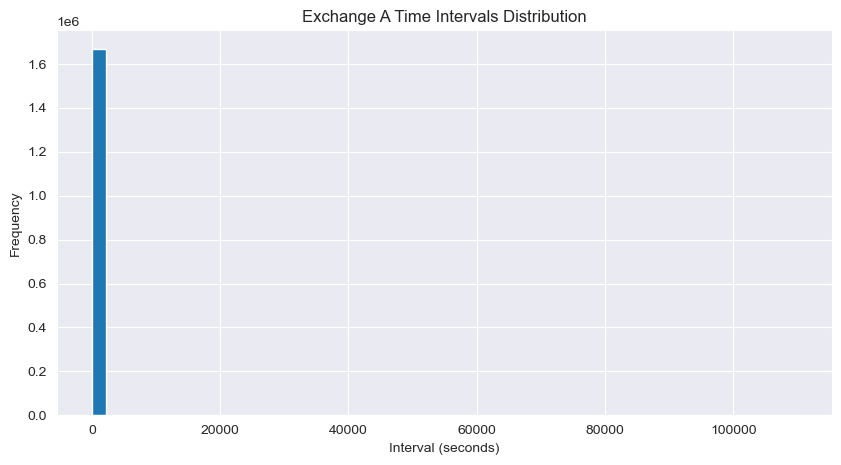


Exchange B Time Interval Analysis:
Mean interval: 276.21 seconds
Median interval: 84.25 seconds
Min interval: 0.00 seconds
Max interval: 34394.97 seconds


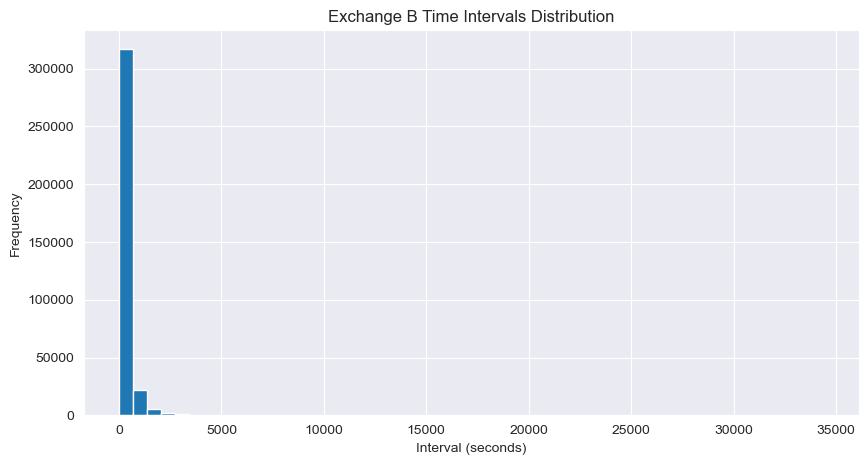

In [19]:
def analyze_time_intervals(df, exchange_name):
    """Analyze the intervals between consecutive timestamps"""
    # Convert timestamps
    try:
        if exchange_name == 'Exchange A':
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
        else:
            # Handle both formats: with and without milliseconds
            df['datetime'] = pd.to_datetime(df['timestamp'], format='mixed')
    except Exception as e:
        # If it fails, let's examine the problematic timestamps
        print(f"Error converting timestamps for {exchange_name}: {e}")
        print("\nSample of problematic timestamps:")
        print(df['timestamp'].head(10))
        return

    # Sort by timestamp
    df = df.sort_values('datetime')

    # Calculate intervals
    intervals = df['datetime'].diff().dt.total_seconds()

    print(f"\n{exchange_name} Time Interval Analysis:")
    print(f"Mean interval: {intervals.mean():.2f} seconds")
    print(f"Median interval: {intervals.median():.2f} seconds")
    print(f"Min interval: {intervals.min():.2f} seconds")
    print(f"Max interval: {intervals.max():.2f} seconds")

    # Plot interval distribution
    plt.figure(figsize=(10, 5))
    intervals.hist(bins=50)
    plt.title(f"{exchange_name} Time Intervals Distribution")
    plt.xlabel('Interval (seconds)')
    plt.ylabel('Frequency')
    plt.show()

# Let's also add a function to examine the unique timestamp formats in the data:
def examine_timestamp_formats(df, exchange_name):
    """Print unique timestamp formats and examples"""
    print(f"\nExamining {exchange_name} timestamp formats:")
    unique_samples = df['timestamp'].drop_duplicates().head(10)
    print("\nSample timestamps:")
    for i, ts in enumerate(unique_samples, 1):
        print(f"{i}. {ts} (length: {len(str(ts))})")

analyze_time_intervals(df_a, 'Exchange A')
analyze_time_intervals(df_b, 'Exchange B')